# Exercises for Session 7: Web Scraping 2

In session 6 you learned how to download the HTML of a webpage. In this session you will learn how to locate the information you want in the HTML. It requires an understanding of how HTML is structured and methods to navigate the structure. In the exercises below you will mainly use the package `BeautifulSoup` to navigate the HTML (read more about BeautifulSoup in the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

# Part 1: Parsing a table from HTML using BeautifulSoup.

In this exercise you will learn how to extract the information you want from a webpage's HTML. `BeautifulSoup` is a useful package in Python that makes it easy to navigate the HTML and find the information you are looking for. 

The purpose of the exercise is to extract the data that are available on this webpage: https://www.basketball-reference.com/leagues/NBA_2018.html

Before working with the exercise, you should watch the 2 videos (7.1 and 7.2) below. The type of data you shall scrape in the exercise is quite different from what you see in the video: In the video we scrape text from articles; in the exercise you will scrape tables and make them into pandas DataFrames. 
Keep in mind that the principles are completely identical: You need to locate the information in the HTML and then convert it to some meaningful data (it could be a text file or a dataframe)

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

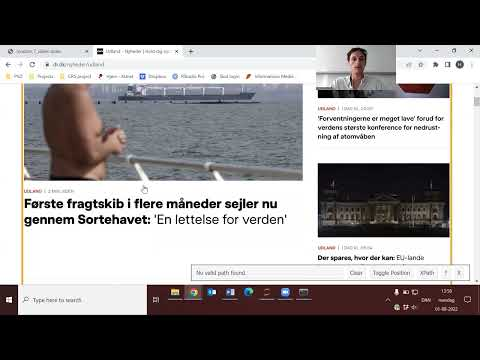

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo('gs0xktunF-g', width=640, height=360)

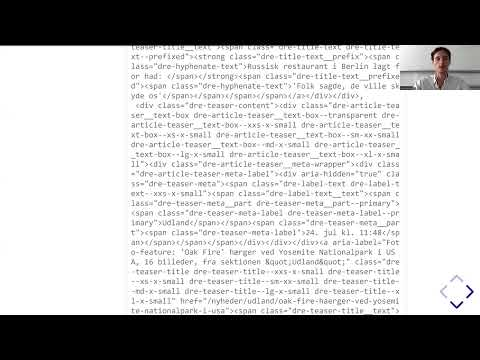

In [52]:
YouTubeVideo('GSUw069jOo8', width=640, height=360)

> **Ex. 7.1.1:** Open https://www.basketball-reference.com/leagues/NBA_2018.html. Download the webpage's HTML as you have done before with `Requests`. We want to locate the conference standings of the Eastern Conference in the HTML. 

> Go to "Elements" in the Chrome Developer Tools and find the Eastern Conference table in the HTML. Use `BeautifulSoup` to parse the HTML, so you only have the HTML of the Eastern Conference table.

> *Hint:* What [tag name](https://www.w3schools.com/TAgs/default.asp) is used for tables? And what [attribute](https://www.w3schools.com/html/html_attributes.asp) identifies the table? Use it to select the table.

In [53]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.basketball-reference.com/leagues/NBA_2018.html'
response = requests.get(url)
soup = BeautifulSoup(response.content,'lxml')

# Find the Eastern Conference table by its tag name 'table' and attribute 'id'
# The id of the Eastern Conference table is 'confs_standings_E'
eastern_conference_table = soup.find('table', {'id': 'confs_standings_E'})

# Print the HTML of the Eastern Conference table
print(eastern_conference_table)


KeyboardInterrupt: 

Now you have located the table. Inspect the table in "Elements" in Chrome Developer Tools and notice how a table is written in HTML. Ask yourself: Which tag names can be used to locate rows? And column names/headers? In the following exercises we use these tag names to download the data in the table.

> **Ex. 7.1.2:** Use `find_all()` to search for the column names/headers of the table. Make a loop to extract the name of each column. Store the column names in a list.

> *Hint:* Notice that the table consists of a 'thead' and 'tbody'. The columns are located in the 'thead'. So first you need to use `find()` to locate the 'thead'.

In [ ]:
# Find the 'thead' of the table
thead = eastern_conference_table.find('thead')

# Find all 'th' tags within the 'thead'
column_headers = thead.find_all('th')

# Extract the name of each column and store them in a list
column_names = [header.get_text() for header in column_headers]

# Print the list of column names
print(column_names)


> **Ex. 7.1.3:** Now locate the rows (the rows are in 'tbody'). Use `find_all()` to locate all rows in the table and store in a list called *rows_list*.

In [ ]:
# Find the 'tbody' of the table
tbody = eastern_conference_table.find('tbody')

# Find all 'tr' tags within the 'tbody'
rows_list = tbody.find_all('tr')

# Print the number of rows in the table
print(rows_list)


> **Ex. 7.1.4:** Loop through all rows in *rows_list* and extract the values. 

> *Hint:* Since the values in a row have different tags ("th" or "tr") we cannot use `find_all()` to go through all values (`find_all()` is used when the tag is the same). Instead we can use `.children` to get all values (/children) in each row. 
> 
> 1. Loop through the values in each row with a `for loop` to get all the values of the row and store in a list (use `append()` to append to list).
>
> 2. Once you have constructed such a loop, you can construct another for loop around it that loops through all the rows in *rows_list*. Your outcome should be a list of the lists of all the row values (again use `append()` to do this).
> - Your outcome should look like this: 
> 
> ```[['Toronto Raptors*', '59', '23', '.720', '—', '111.7', '103.9', '7.29'],
 ['Boston Celtics*', '55', '27', '.671', '4.0', '104.0', '100.4', '3.23'],
 ...]```

In [ ]:
# Initialize an empty list to store all rows' values
all_rows_values = []

# Loop through all rows in rows_list
for row in rows_list:
    # Initialize an empty list to store the current row's values
    row_values = []
    # Loop through all values in the current row using .children
    for value in row.children:
        # Check if the value is a 'th' or 'td' tag
        if value.name in ['th', 'td']:
            # Append the value's text to row_values list
            row_values.append(value.text.strip())
    # Append the row_values list to all_rows_values list
    all_rows_values.append(row_values)

# Print the outcome
for row_values in all_rows_values:
    print(row_values)

> **Ex. 7.1.5:** Combine your answers to **Ex. 7.1.2-4** to make a function called *parse_html_table* that creates a DataFrame from the HTML.

> *Hint:* The only new thing you need to do is to create a DataFrame out of the list of lists you made in ex. 7.1.4.
>
> Try to search on google to figure out how to make a dataframe out of a list of lists.

In [ ]:
import pandas as pd

def parse_html_table(url):
    # Download the webpage's HTML
    response = requests.get(url)
    html = response.text

    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Find the Eastern Conference table by its tag name 'table' and attribute 'id'
    # The id of the Eastern Conference table is 'confs_standings_E'
    eastern_conference_table = soup.find('table', {'id': 'confs_standings_E'})

    # Find the 'thead' of the table
    thead = eastern_conference_table.find('thead')

    # Find all 'th' tags within the 'thead' to get the column names/headers
    column_names = [th.text.strip() for th in thead.find_all('th')]

    # Find the 'tbody' of the table
    tbody = eastern_conference_table.find('tbody')

    # Find all 'tr' tags within the 'tbody'
    rows_list = tbody.find_all('tr')

    # Initialize an empty list to store all rows' values
    all_rows_values = []

    # Loop through all rows in rows_list
    for row in rows_list:
        # Initialize an empty list to store the current row's values
        row_values = []
        # Loop through all values in the current row using .children
        for value in row.children:
            # Check if the value is a 'th' or 'td' tag
            if value.name in ['th', 'td']:
                # Append the value's text to row_values list
                row_values.append(value.text.strip())
        # Append the row_values list to all_rows_values list
        all_rows_values.append(row_values)

    # Create a DataFrame from the list of lists
    df = pd.DataFrame(all_rows_values, columns=column_names)

    return df

# URL of the webpage
url = "https://www.basketball-reference.com/leagues/NBA_2018.html"

# Call the function to get the DataFrame
eastern_conference_df = parse_html_table(url)

# Print the DataFrame
eastern_conference_df


> **Ex. 7.1.6:** Now instead of only looking at the Eastern Conference standings table we want to get the data of all tables on the webpage. 

> 1. Locate all tables on the page by using `find_all()` to search for the table tag name (```<table>```). Name the list of tables as "tables".

> 2. Use your function *parse_html_table* to loop through all tables in "tables" and parse their data. Store all the dataframes in a list.
>
> *Hint:* You need to make a for loop with two lines of code in it: 
>- in the first line you use your function *parse_html_table* to make a dataframe, 
>- and in the second line you append the dataframe to an empty list of dataframes that you have made before the loop.

In [ ]:
# Find all tables
tables = soup.find_all('table')

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def parse_html_table(table):
    # Find the 'thead' of the table
    thead = table.find('thead')
    # Find all 'th' tags within the 'thead' to get the column names/headers
    column_names = [th.text.strip() for th in thead.find_all('th')]

    # Find the 'tbody' of the table
    tbody = table.find('tbody')
    # Find all 'tr' tags within the 'tbody'
    rows_list = tbody.find_all('tr')

    # Initialize an empty list to store all rows' values
    all_rows_values = []

    # Loop through all rows in rows_list
    for row in rows_list:
        # Initialize an empty list to store the current row's values
        row_values = []
        # Loop through all values in the current row using .children
        for value in row.children:
            # Check if the value is a 'th' or 'td' tag
            if value.name in ['th', 'td']:
                # Append the value's text to row_values list
                row_values.append(value.text.strip())
        # Append the row_values list to all_rows_values list if the number of columns match
        if len(row_values) == len(column_names):
            all_rows_values.append(row_values)

    # Create a DataFrame from the list of lists
    df = pd.DataFrame(all_rows_values, columns=column_names)

    return df

# URL of the webpage
url = "https://www.basketball-reference.com/leagues/NBA_2018.html"

# Download the webpage's HTML
response = requests.get(url)
html = response.text

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# List to store all DataFrames
all_dataframes = []

# Loop through all tables and parse their data using the parse_html_table function
for table in tables:
    df = parse_html_table(table)
    all_dataframes.append(df)

# Print the dataframes
for i, df in enumerate(all_dataframes):
    print(f"Table {i + 1}")
    print(df)
    print()


In [ ]:
dfs[0]

> **Ex. 7.1.7 (extra) :** `Pandas` has a built-in function called `read_html()` that does the exact same thing as you have just learned. Compare your results to this Pandas implementation ([pd.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)). 

> *Note:* It may seem like a lot of work to go through all the steps when there is a function that does it already. However, the purpose of the exercises above is to prepare you for your own scraping challenges, and that is best done by hard coding everything. It is also important to note that scraping is no exact science, so there may be websites where the general function `read_html()` does not work. In those cases, you should be able to build your own scraper.

In [ ]:
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html' # Link to the website
dfs = pd.read_html(url) # Parses all tables found on the page.
dfs[0]